## Installing the Packages

In [1]:
!pip install openpyxl

## Preparing the Data

In [2]:
# Reading the data files

import pandas as pd

# read the files
pubs = pd.read_excel('Final_Authors_Topics_Filtered_Publications.xlsx')
authors1 = pd.read_excel('authors_metadata.xlsx')
authors2 = pd.read_excel('authors_metadata_v2_9999_plus.xlsx')
authors = pd.concat([authors1, authors2])

# print the first five rows of the dataframes
print(pubs.head(), authors.head())

                  eid                             doi                pii  \
0  2-s2.0-85127682728      10.1007/s10462-022-10151-2                NaN   
1  2-s2.0-85141298749       10.1016/j.ins.2022.10.039  S0020025522011598   
2  2-s2.0-85106864668         10.3390/jimaging7020037                NaN   
3  2-s2.0-85078830482  10.1109/ICOM47790.2019.8952067                NaN   
4  2-s2.0-85141921387            10.1155/2022/1645658                NaN   

   pubmed_id                                              title subtype  \
0        NaN  An analysis of graph convolutional networks an...      ar   
1        NaN  Mesh Oversegmentation with Segmentation-Aware ...      ar   
2        NaN  Active learning with bayesian unet for efficie...      ar   
3        NaN  Robust, Fast and Accurate Lane Departure Warni...      cp   
4        NaN  A Secure and Robust Autoencoder-Based Perceptu...      ar   

  subtypeDescription          creator  afid  \
0            Article       Yusuf A.A.   NaN  

In [3]:
# Adding a "Year" column to the publications dataframe

pubs['coverDate'] = pd.to_datetime(pubs['coverDate'])
pubs['Year'] = pubs['coverDate'].dt.year
pubs['Year']

0        2022
1        2022
2        2021
3        2019
4        2022
         ... 
12149    2018
12150    2017
12151    2021
12152    2018
12153    2019
Name: Year, Length: 12154, dtype: int64

In [4]:
# Create a dataframe with number of publications per year per country
# Columns are sorted based on the years

results = pd.DataFrame()
keys = []
for index, row in pubs.iterrows():
    if row['Year'] not in results.columns:
        results[row['Year']] = 0
    temp_authors = authors[authors['eid'] == row['eid']]
    #count only publications (not the authors)
    temp_authors = temp_authors.drop_duplicates(subset=['country']) 
    temp_authors = temp_authors['country'].value_counts()
    for key, value in temp_authors.items():
        key = key.lower()
        if key not in results.index:
            results.loc[key] = 0
            keys +=  [key]
        results.loc[key, row['Year']] = results.loc[key, row['Year']] + value
results = results.sort_index(axis=1, ascending=False).reset_index().rename(columns={'index': 'Country'})
results

,Country,2023,2022,2021,2020,2019,2018,2017,2016,2015,...,1988,1987,1985,1984,1982,1981,1979,1975,1974,1973
0,china,7,102,90,71,51,35,21,12,12,...,0,0,0,0,0,0,0,0,0,0
1,nigeria,7,94,82,50,46,25,18,13,4,...,0,0,0,0,0,0,0,0,0,0
2,canada,3,40,42,32,23,23,8,17,9,...,0,0,0,2,0,1,0,0,0,0
3,romania,1,4,1,0,3,1,2,3,1,...,0,0,0,0,0,0,0,0,0,0
4,malaysia,6,25,26,16,10,16,4,5,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,cape verde,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
146,suriname,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
147,kyrgyzstan,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
148,latvia,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
keys

['china',
 'nigeria',
 'canada',
 'romania',
 'malaysia',
 'india',
 'ethiopia',
 'saudi arabia',
 'sweden',
 'egypt',
 'switzerland',
 'algeria',
 'ireland',
 'south korea',
 'spain',
 'japan',
 'tunisia',
 'united states',
 'france',
 'united kingdom',
 'pakistan',
 'united arab emirates',
 'czech republic',
 'palestine',
 'qatar',
 'australia',
 'germany',
 'tanzania',
 'south africa',
 'netherlands',
 'brazil',
 'belgium',
 'italy',
 'kenya',
 'uganda',
 'sudan',
 'morocco',
 'peru',
 'portugal',
 'ghana',
 'cameroon',
 'senegal',
 'zimbabwe',
 'rwanda',
 'oman',
 'turkey',
 'libyan arab jamahiriya',
 'mauritania',
 'swaziland',
 'serbia',
 'mauritius',
 'poland',
 'colombia',
 'chile',
 'iraq',
 'russian federation',
 'bangladesh',
 'singapore',
 'norway',
 'jordan',
 'argentina',
 'ukraine',
 'madagascar',
 'myanmar',
 'malawi',
 'congo',
 'austria',
 'indonesia',
 'benin',
 'mexico',
 'denmark',
 'kazakhstan',
 'yemen',
 'finland',
 'hungary',
 'malta',
 'kuwait',
 'namibia',
 '

## Preparing African Countries and Regions

In [6]:
# Creating lists of African countries per region

northern_countries = ['algeria', 'egypt', 'libya', 'libyan arab jamahiriya', 'morocco', 'sudan', 'tunisia', 'western sahara']
southern_countries = ['angola', 'botswana', 'lesotho', 'mozambique', 'namibia', 'south africa', 'swaziland', 'eswatini', 'zambia', 'zimbabwe']
west_countries = ['benin', 'burkina faso', 'cape verde', 'cabo verde', "côte d'ivoire", "cote d'ivoire", 'ivory coast', 'gambia', 'ghana', 'guinea', 'guinea-bissau', 'liberia', 'mali', 'mauritania', 'niger', 'nigeria', 'senegal', 'sierra leone', 'togo', 'saint helena']
east_countries = ['burundi', 'comoros', 'djibouti', 'eritrea', 'ethiopia', 'kenya', 'madagascar', 'malawi', 'mauritius', 'réunion', 'reunion', 'rwanda', 'seychelles', 'somalia', 'somaliland', 'tanzania', 'united republic of tanzania', 'uganda', 'south sudan', 'mayotte']
central_countries = ['cameroon', 'central african republic', 'chad', 'congo', 'congo republic - brazzaville', 'congo-brazzaville', 'congo-kinshasa', 'republic of the congo', 'democratic republic congo', 'democratic republic of congo', 'democratic republic of the congo', 'equatorial guinea', 'gabon', 'são tomé & principe', 'sao tome and principe']
all_african_countries = northern_countries + southern_countries + west_countries + east_countries + central_countries

In [7]:
# Check intersection between the list of African countries and countries in our database

intersection = set(all_african_countries).intersection(keys)
non_intersection = set(all_african_countries).symmetric_difference(set(keys))
len(intersection), len(non_intersection)

(50, 123)

## Generating the Bar Chart 

In [8]:
# Generating the bar chart data by counting the number of publications per region per year
# All years before 2012 are summed togther

results_final = pd.DataFrame()
results_before_2012 = results.iloc[:, 13:].sum(axis=1)
results_sum = results.iloc[:, :13]
results_sum['Before 2012'] = results_before_2012
regions = ['northern_countries', 'southern_countries', 'west_countries', 'east_countries', 'central_countries']
for i in regions:
    results_final[i] = results_sum[results_sum['Country'].isin(globals()[i])].iloc[:, 1:].sum(axis=0)
results_final.to_csv('time_analysis_verified_data.csv')
results_final

,northern_countries,southern_countries,west_countries,east_countries,central_countries
2023,122,15,11,5,2
2022,1379,188,173,221,17
2021,1212,185,121,122,23
2020,1057,179,91,67,16
2019,907,161,73,53,11
2018,808,111,40,40,9
2017,655,90,27,24,1
2016,626,59,21,16,2
2015,421,61,10,25,3
2014,429,49,19,13,3


In [9]:
results_sum[results_sum['Country'].isin(globals()[regions[0]])]

,Country,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,Before 2012
9,egypt,74,600,530,380,341,224,151,184,126,139,106,120,520
11,algeria,15,237,209,179,181,130,99,112,111,78,76,60,314
16,tunisia,15,261,230,247,167,234,226,176,110,166,86,85,310
35,sudan,1,13,11,13,16,24,9,7,3,2,8,2,11
36,morocco,17,247,212,227,197,190,167,142,65,43,31,33,135
46,libyan arab jamahiriya,0,21,20,11,5,6,3,5,6,1,3,0,8


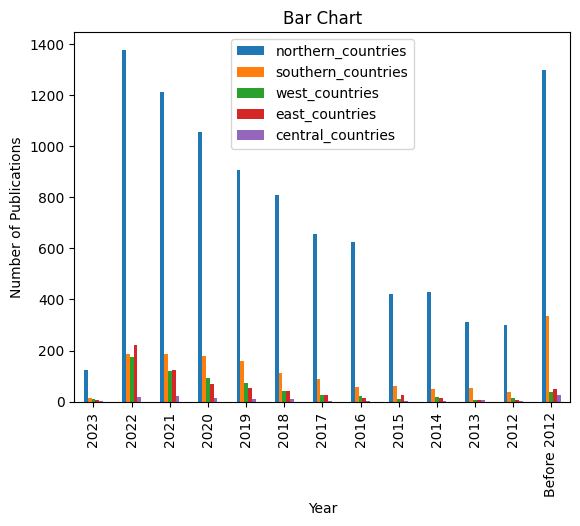

In [10]:
# Plotting the bar chart

import matplotlib.pyplot as plt

ax = results_final.plot(kind='bar')

# Add axis labels and a title
ax.set_xlabel('Year')
ax.set_ylabel('Number of Publications')
ax.set_title('Bar Chart')

# Show the chart
plt.show()